# Wholesale customers Dataset

In [1]:
import numpy as np
import pandas as pd 
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import xgboost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from xgboost import cv
from sklearn.preprocessing import  StandardScaler , MinMaxScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.decomposition import PCA


In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("default", category=UserWarning)

## Explanatory Data Analysis 

In [3]:
df = pd.read_excel("Wholesale customers data.xlsx")
print ("data is read")

data is read


In [4]:
df.shape

(440, 8)

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [7]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [9]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [11]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

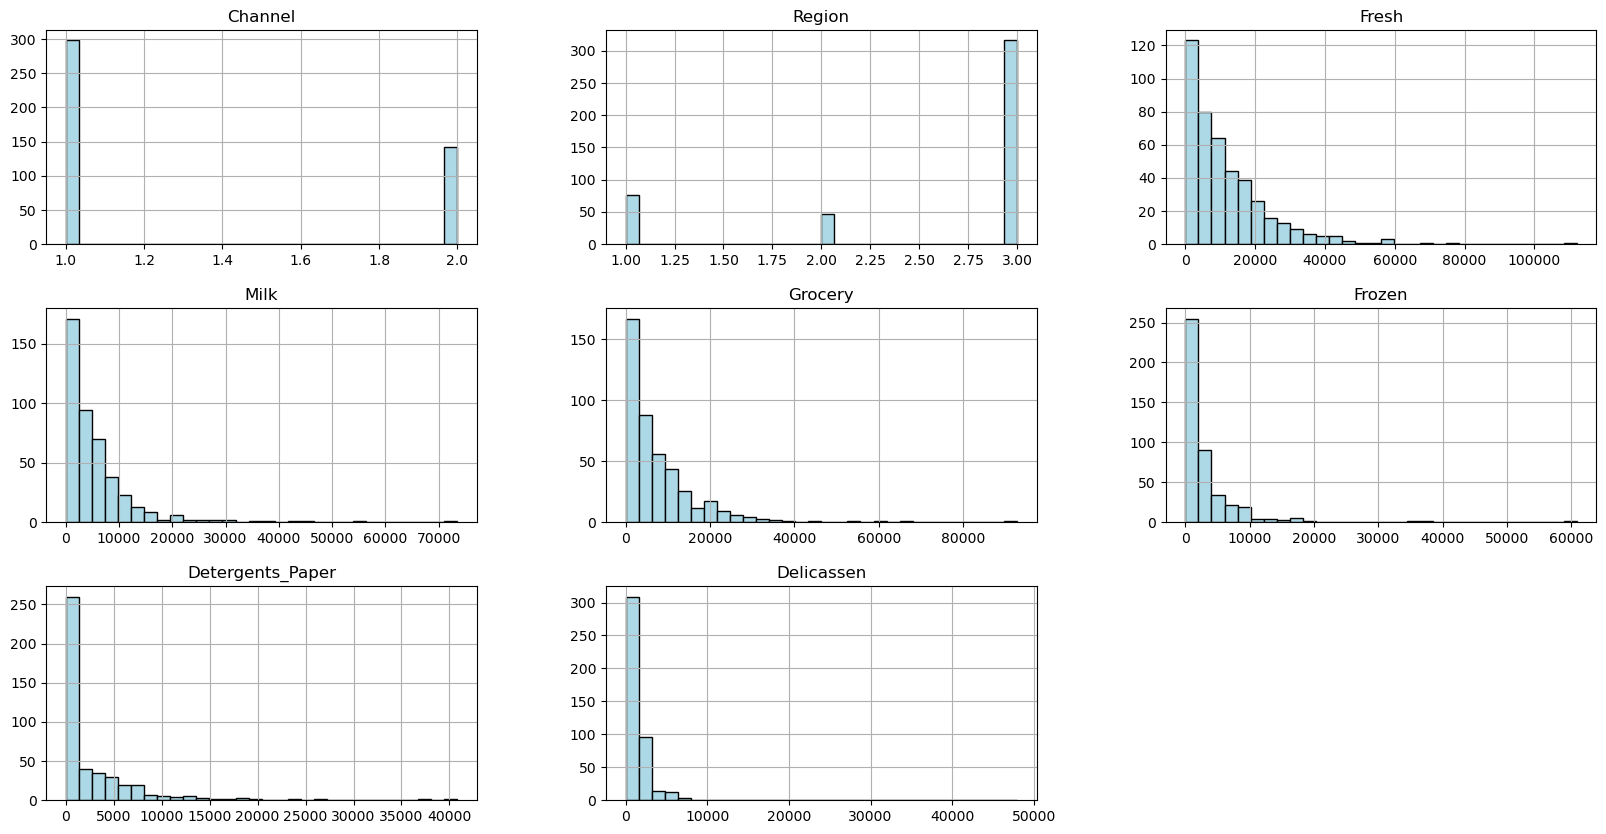

In [12]:
df.hist(figsize=(20,10),bins=30, color='lightblue', edgecolor='black')
plt.show()

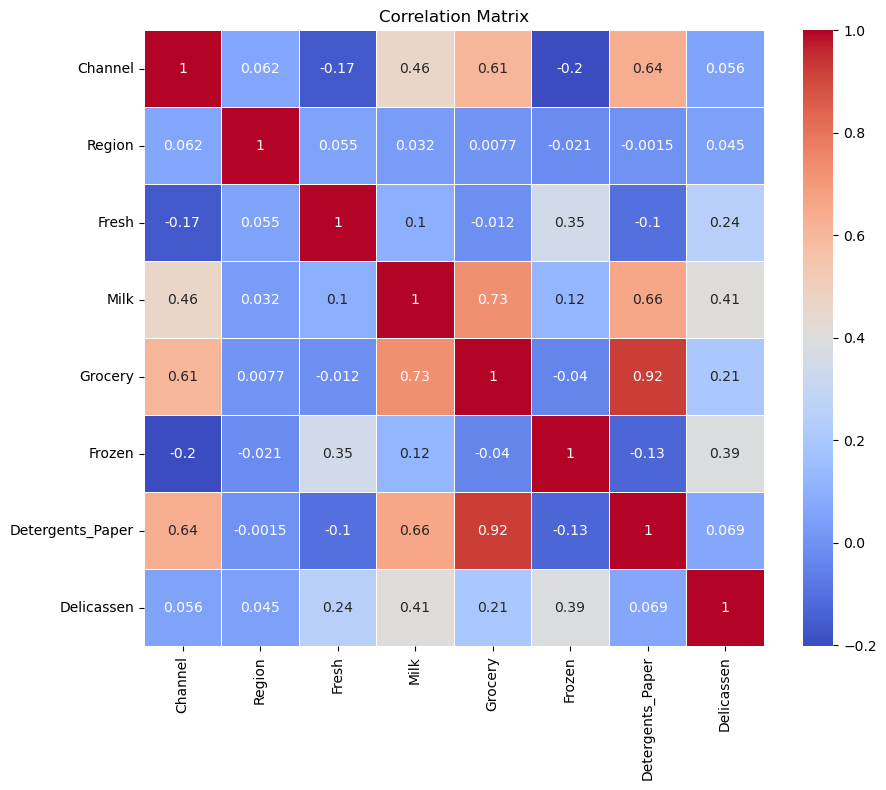

In [13]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Grouped by Region:
         Channel         Fresh         Milk      Grocery       Frozen  \
Region                                                                  
1       1.233766  11101.727273  5486.415584  7403.077922  3000.337662   
2       1.404255   9887.680851  5088.170213  9218.595745  4045.361702   
3       1.332278  12533.471519  5977.085443  7896.363924  2944.594937   

        Detergents_Paper   Delicassen  
Region                                 
1            2651.116883  1354.896104  
2            3687.468085  1159.702128  
3            2817.753165  1620.601266  

Grouped by Channel:
           Region         Fresh          Milk       Grocery       Frozen  \
Channel                                                                    
1        2.510067  13475.560403   3451.724832   3962.137584  3748.251678   
2        2.612676   8904.323944  10716.500000  16322.852113  1652.612676   

         Detergents_Paper   Delicassen  
Channel                                 
1      

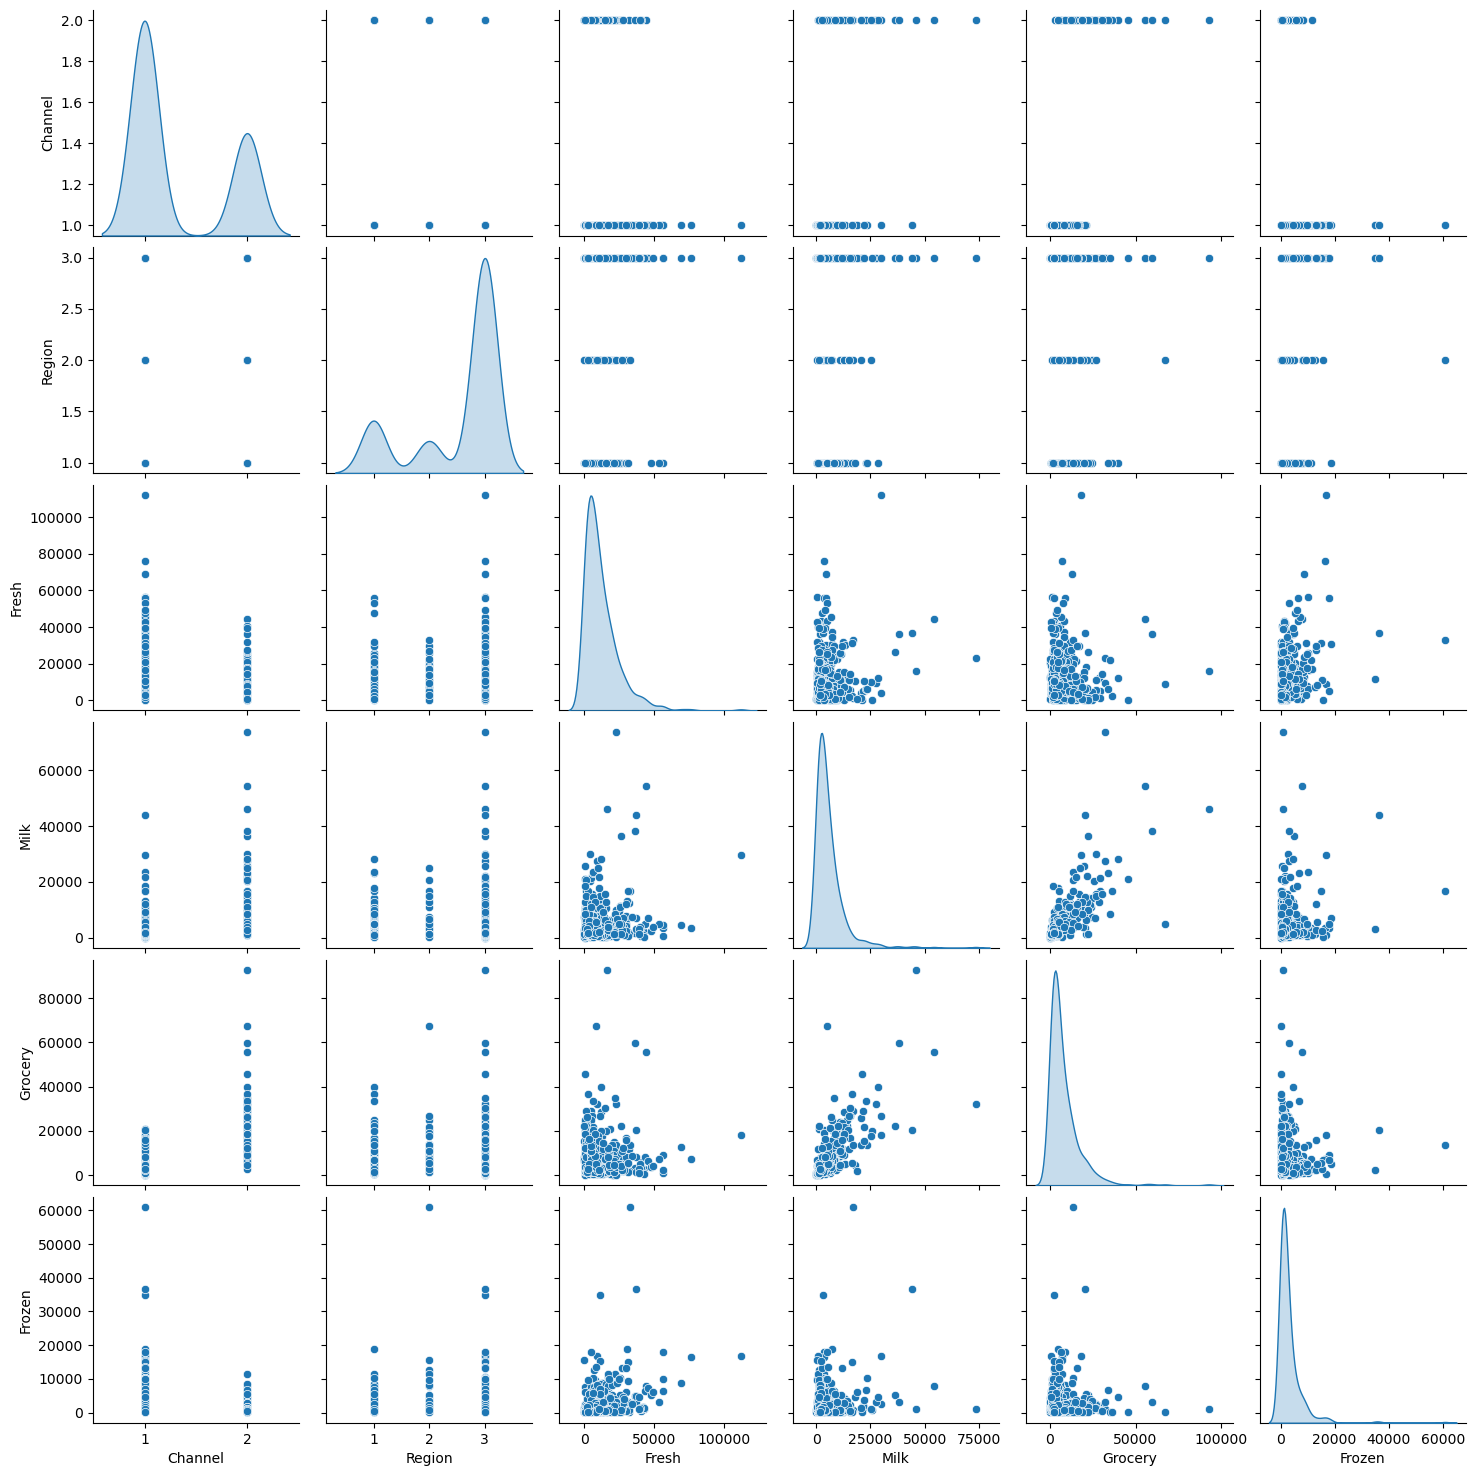

In [14]:
# Grouped Analysis
grouped_by_region = df.groupby('Region').mean()
grouped_by_channel = df.groupby('Channel').mean()
print("Grouped by Region:")
print(grouped_by_region)
print("\nGrouped by Channel:")
print(grouped_by_channel)

# Data Visualization (Scatter Plots)
snb.pairplot(df, vars=df.columns[:6], diag_kind='kde')
plt.show()

In [15]:
pd.DataFrame(df).describe().head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937


## Feature Scaling to Normalize the data

### Implementing MinMax scaling

In [16]:
scaler_MinMax = MinMaxScaler().fit_transform(df)
scaler_MinMax[:5]

array([[1.        , 1.        , 0.11294004, 0.13072723, 0.08146416,
        0.0031063 , 0.0654272 , 0.02784731],
       [1.        , 1.        , 0.06289903, 0.13282409, 0.10309667,
        0.02854842, 0.08058985, 0.03698373],
       [1.        , 1.        , 0.05662161, 0.11918086, 0.08278992,
        0.03911643, 0.08605232, 0.16355861],
       [0.        , 1.        , 0.11825445, 0.01553586, 0.04546385,
        0.10484189, 0.01234568, 0.03723404],
       [1.        , 1.        , 0.20162642, 0.07291369, 0.07755155,
        0.063934  , 0.04345483, 0.10809345]])

In [17]:
# Convert the scaled data back to a DataFrame with the same columns
scaled_df = pd.DataFrame(scaler_MinMax, columns=df.columns)

# Now, scaled_df contains the scaled data in the same structure as df
print(scaled_df.head())

   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0      1.0     1.0  0.112940  0.130727  0.081464  0.003106          0.065427   
1      1.0     1.0  0.062899  0.132824  0.103097  0.028548          0.080590   
2      1.0     1.0  0.056622  0.119181  0.082790  0.039116          0.086052   
3      0.0     1.0  0.118254  0.015536  0.045464  0.104842          0.012346   
4      1.0     1.0  0.201626  0.072914  0.077552  0.063934          0.043455   

   Delicassen  
0    0.027847  
1    0.036984  
2    0.163559  
3    0.037234  
4    0.108093  


In [18]:
pd.DataFrame(scaler_MinMax).describe().head(3)

,0,1,2,3,4,5,6,7
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.00000,440.000000
mean,0.322727,0.771591,0.106977,0.078173,0.085671,0.050078,0.07051,0.031745
std,0.468052,0.387136,0.112774,0.100491,0.102430,0.079789,0.11679,0.058826


### Implementing StandardScaler

In [19]:
scaler_Standard = StandardScaler().fit_transform(df)
scaler_Standard[:5]

array([[ 1.44865163,  0.59066829,  0.05293319,  0.52356777, -0.04111489,
        -0.58936716, -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197,  0.54445767,  0.17031835,
        -0.27013618,  0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926,  0.40853771, -0.0281571 ,
        -0.13753572,  0.13323164,  2.24329255],
       [-0.69029709,  0.59066829,  0.10011141, -0.62401993, -0.3929769 ,
         0.6871443 , -0.49858822,  0.09341105],
       [ 1.44865163,  0.59066829,  0.84023948, -0.05239645, -0.07935618,
         0.17385884, -0.23191782,  1.29934689]])

In [20]:
pd.DataFrame(scaler_Standard).describe().head(3)

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00


In [21]:
# Convert the scaled data back to a DataFrame with the same columns
scaled_Standard_df = pd.DataFrame(scaler_Standard, columns=df.columns)

# Now, scaled_df contains the scaled data in the same structure as df
print(scaled_Standard_df.head())

    Channel    Region     Fresh      Milk   Grocery    Frozen  \
0  1.448652  0.590668  0.052933  0.523568 -0.041115 -0.589367   
1  1.448652  0.590668 -0.391302  0.544458  0.170318 -0.270136   
2  1.448652  0.590668 -0.447029  0.408538 -0.028157 -0.137536   
3 -0.690297  0.590668  0.100111 -0.624020 -0.392977  0.687144   
4  1.448652  0.590668  0.840239 -0.052396 -0.079356  0.173859   

   Detergents_Paper  Delicassen  
0         -0.043569   -0.066339  
1          0.086407    0.089151  
2          0.133232    2.243293  
3         -0.498588    0.093411  
4         -0.231918    1.299347  


### ploting kde plots for Standard scaled values and Min Max scaled values

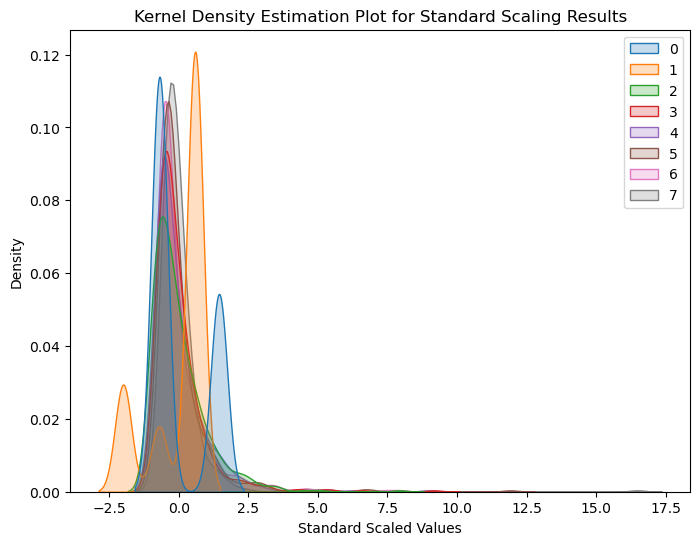

In [22]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to create a KDE plot
snb.kdeplot(data=scaler_Standard, shade=True, color='b', ax=ax)

# Add labels and a title
ax.set_xlabel("Standard Scaled Values")
ax.set_ylabel("Density")
ax.set_title("Kernel Density Estimation Plot for Standard Scaling Results")

# Display the plot
plt.show()

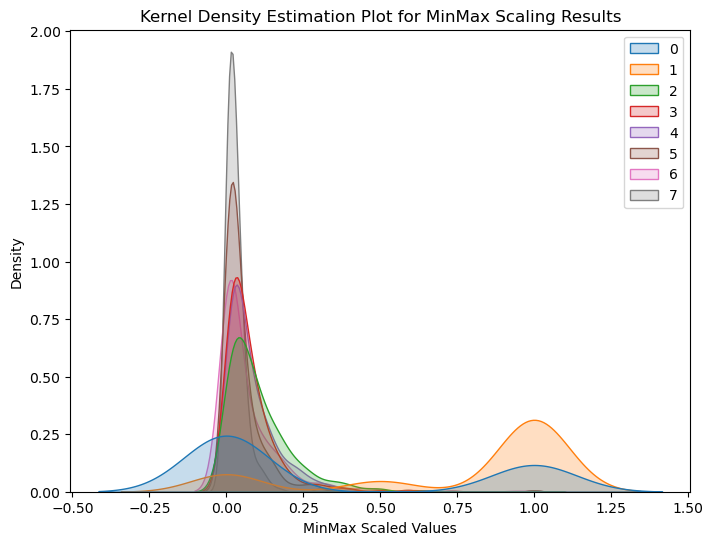

In [23]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Use Seaborn to create a KDE plot
snb.kdeplot(data=scaler_MinMax, shade=True, color='b', ax=ax)

# Add labels and a title
ax.set_xlabel("MinMax Scaled Values")
ax.set_ylabel("Density")
ax.set_title("Kernel Density Estimation Plot for MinMax Scaling Results")

# Display the plot
plt.show()

#### Moving forward I will be using MinMax scaler since the MinMax scaler scales continuous features to a specific range. This scaler is good choice since it  preserve the relationships between the features and have them all within a common range.

In [24]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.3.0.


In [25]:
# Define your features (X) and target (y)
X = scaled_df.drop(columns=['Channel'])
y = scaled_df['Channel']

## Performing RFECV 

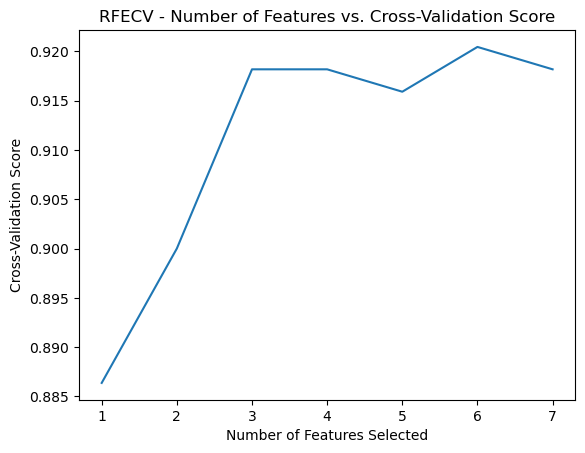

Optimal number of features: 6
Number of steps in RFECV: 7


In [26]:
# Create a RandomForestClassifier as your estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=7)

# Create RFECV with StratifiedKFold for cross-validation
rfecv = RFECV(estimator, cv=StratifiedKFold(5), scoring='accuracy')
rfecv.fit(X, y)

# Plot the number of features vs. cross-validation score
plt.figure()
plt.title('RFECV - Number of Features vs. Cross-Validation Score')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross-Validation Score')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# The optimal number of features can be obtained using rfecv.n_features_
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the mean test scores during the feature selection process
mean_test_scores = rfecv.cv_results_['mean_test_score']

print("Number of steps in RFECV:", len(mean_test_scores))


## Elbow method for KMeans Clustering

c:\Users\semal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\semal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\semal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\semal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

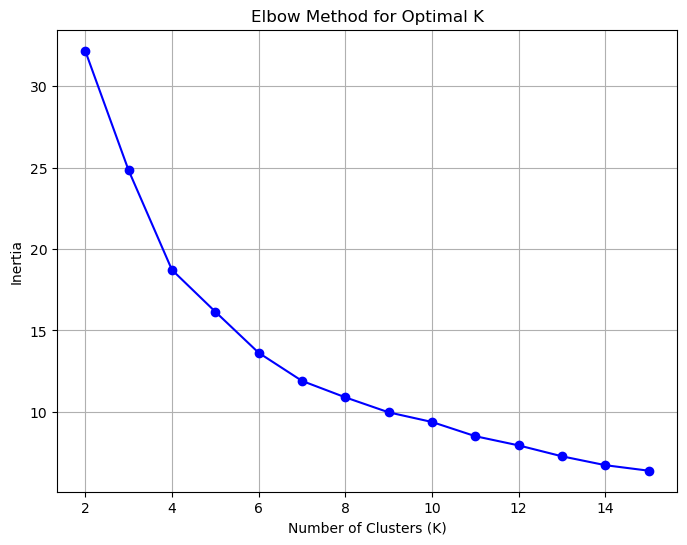

The optimal number of clusters (K) is: 3


In [27]:
# Define the range of K values you want to test (e.g., from K=2 to K=15)
K_values = range(2, 16)

# Initialize an empty list to store the inertia (within-cluster sum of squares) values
inertia = []

# Iterate over the K values and fit KMeans for each K
for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    # Append the inertia value to the list
    inertia.append(kmeans.inertia_)

# Plot the elbow method to identify the optimal K
plt.figure(figsize=(8, 6))
plt.plot(K_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Identify the optimal K using the "elbow" method
diff = np.diff(inertia)
k_optimal = K_values[np.argmin(diff) + 1]

print(f"The optimal number of clusters (K) is: {k_optimal}")

## Implementing PCA

In [28]:
pca = PCA(n_components=7)  # Specify the number of components as None to retain all components
X_pca = pca.fit_transform(X)

In [29]:
X.shape

(440, 7)

In [30]:
X_pca.shape

(440, 7)

### Variance is explained by first 2 components and by first 4 components

In [31]:
variance_2 = np.sum(pca.explained_variance_[:2])
print(f"Variance explained by the first 2 components: {variance_2:.2f}")

Variance explained by the first 2 components: 0.18


In [32]:
variance_4 = np.sum(pca.explained_variance_[:4])
print(f"Variance explained by the first 4 components: {variance_4:.2f}")


Variance explained by the first 4 components: 0.20


c:\Users\semal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


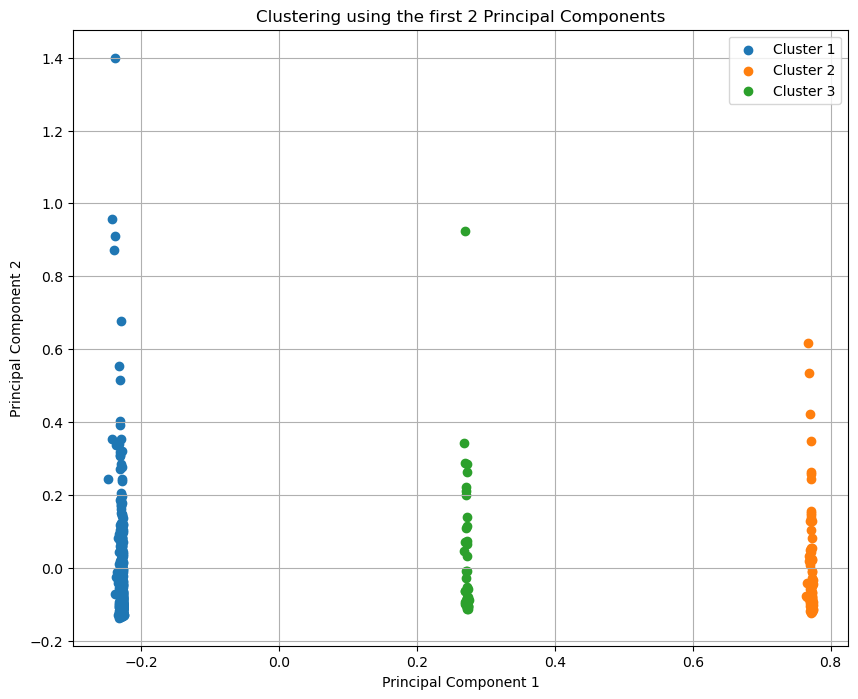

In [45]:
# Visualize the clusters in the data 
optimal_K = 3
kmeans = KMeans(n_clusters=optimal_K, random_state=42)
kmeans.fit(X_pca)

# Visualize the clusters using the first two principal components
plt.figure(figsize=(10, 8))
for i in range(optimal_K):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i + 1}')
plt.title('Clustering using the first 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

<li>The clusters appear to be well separated, suggesting that the clustering algorithm was able to identify distinct groups in the data.The clear separation of clusters indicates that the PCA and clustering were successful in grouping similar data points together.</li>

### Split data into separate training and test set

In [34]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## k-fold Cross Validation using XGBoost 

In [35]:
%pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


#### Train the XGBoost Classifier

In [36]:
# declare parameters
from sklearn.metrics import classification_report


param_grid = {
    'max_depth': [3, 4, 5, 6, 8 ,10],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150 ,200],
}

# Create an XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic', alpha=10, random_state=42)

# Create a 5-fold cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create the GridSearchCV object to find the best parameters
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='accuracy', cv=cv)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

# Print the best parameters and accuracy
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)



Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150}
Best Accuracy: 0.9058699101004761


#### Make predictions with XGBoost Classifier 

In [37]:
# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

#### Make predictions with XGBoost Classifier 

In [38]:
# make predictions on test data

y_pred = xgb_clf.predict(X_test)

#### Check accuracy score and perform evaluation metrics using classification

In [39]:
# compute and print accuracy score

from sklearn.metrics import accuracy_score

print('XGBoost model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))



XGBoost model accuracy score: 0.8864


## Evaluation Metrics

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Use the best model to make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-Score:", f1)


Test Accuracy: 0.8787878787878788
Test Precision: 0.875
Test Recall: 0.7608695652173914
Test F1-Score: 0.813953488372093


In [41]:
grid_predictions = grid_search.predict(X_train) 

# print classification report 
print(classification_report(y_train, grid_predictions)) 

              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       212
         1.0       0.89      0.89      0.89        96

    accuracy                           0.93       308
   macro avg       0.92      0.92      0.92       308
weighted avg       0.93      0.93      0.93       308



#### Feature importance with XGBoost 

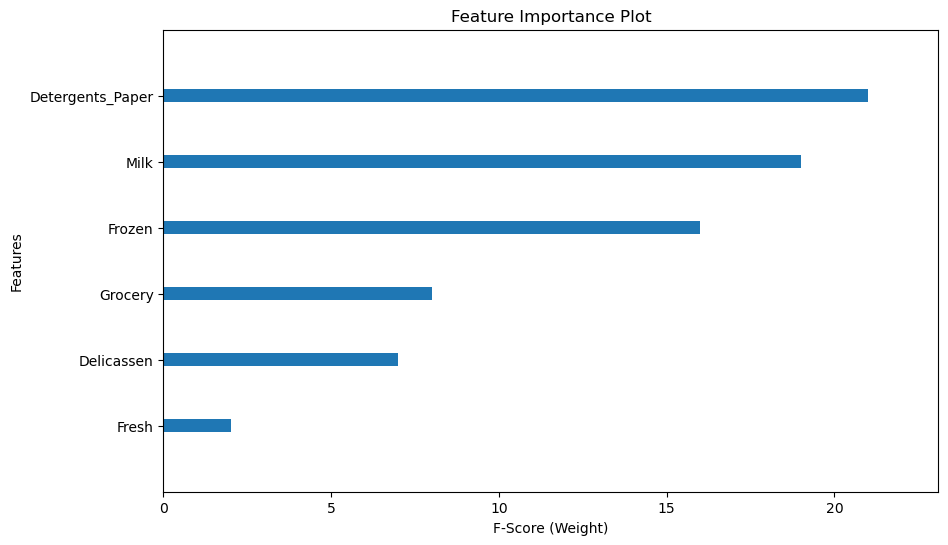

In [42]:
# Plot feature importance
xgboost.plot_importance(xgb_clf, importance_type='weight', show_values=False, max_num_features=10, grid=False)
plt.gcf().set_size_inches(10, 6)  # Set the figure size
plt.xlabel("F-Score (Weight)")  # X-axis label
plt.ylabel("Features")  # Y-axis label
plt.title("Feature Importance Plot")  # Title
plt.show()